In [1]:
import pandas as pd
import numpy as np

print('Loading data...\n')
df_train = pd.read_csv('Beauty_TRAIN.csv')
df_test = pd.read_csv('Beauty_TEST.csv')
df_train.head()

Loading data...



,Unnamed: 0,X,y
0,22157,"This product is impressive. Silky smooth, ver...",1
1,19504,The key to using SLS free shampoo is to add wa...,1
2,23700,i know there is some bad reviews of this on he...,1
3,13943,My husband and I both tried this dandruff sham...,1
4,4219,This glue is really strong and dries extremely...,1


In [ ]:
# slicing data 

In [2]:
x_train = df_train['X']
y_train = df_train['y']

x_test = df_test['X']
y_test = df_test['y']

print(len(x_train), '\ttrain sequences')
print(len(x_test), '\ttest sequences')
num_classes = np.max(y_train) + 1
print('(',num_classes, '\tclasses )')

10000 	train sequences
30000 	test sequences
( 2 	classes )


In [ ]:
# PREPARING DATA

In [3]:
print(x_train[0]) #first sentence before tokenizing

This product is impressive.  Silky smooth, very, very, light pleasant fragrance (almost undetectable), not oily or greasy, not drying.  Left my skin feeling clean, moist, and refreshed.  I have a difficult time finding products that do not irritate my skin.  This did not cause any irritation, itching, burning, redness... nothing.  Just clean.  I will most definitely be looking for this product on the market.


In [4]:
#http://www.orbifold.net/default/2017/01/10/embedding-and-tokenizer-in-keras/

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = None
maxlen = 100

print('Performing the Sentences Tokenizer...')
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
#print(tokenizer.word_index)
vocab_size=len(tokenizer.word_index)
print(vocab_size)

#texts_to_sequences which turns input into numerical arrays
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

print('\nFirst Sentence after tokenizing:', sequences_train[0])

print('\n\rPerforming the Pad sequences method...\n\r')
x_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
x_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

print('Dataset Preprocessing Completed:\r')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

/home/centos/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Performing the Sentences Tokenizer...
19551

First Sentence after tokenizing: [8, 22, 9, 2272, 474, 159, 28, 28, 132, 455, 263, 249, 6261, 19, 212, 29, 224, 19, 334, 293, 7, 24, 219, 146, 1185, 3, 1395, 1, 16, 5, 692, 66, 1209, 82, 12, 57, 19, 959, 7, 24, 8, 97, 19, 609, 91, 953, 1396, 1063, 924, 306, 33, 146, 1, 45, 186, 150, 31, 142, 11, 8, 22, 15, 2, 751]

Performing the Pad sequences method...

Dataset Preprocessing Completed:
x_train shape: (10000, 100)
x_test shape: (30000, 100)


In [6]:
print(x_train[0]) #first sentence transformed

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    8   22    9 2272  474  159
   28   28  132  455  263  249 6261   19  212   29  224   19  334  293
    7   24  219  146 1185    3 1395    1   16    5  692   66 1209   82
   12   57   19  959    7   24    8   97   19  609   91  953 1396 1063
  924  306   33  146    1   45  186  150   31  142   11    8   22   15
    2  751]


In [ ]:
# BUILD THE DL MODEL

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import RMSprop

print('Building the model...')
# define the model
model = Sequential()
emb = Embedding(vocab_size+1, output_dim = 300, input_length=maxlen, trainable = True)
model.add(emb)
model.add(LSTM(128, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# summarize the model
print(model.summary())

Building the model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          5865600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,085,377
Trainable params: 6,085,377
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
import numpy as np
np.set_printoptions(suppress=True) 

print(emb.get_weights())#[0][0] #weights for the 1st word in the vocabulary

[array([[-0.02565621, -0.02371781, -0.03780518, ...,  0.01122495,
         0.02008227,  0.00145911],
       [ 0.00031275,  0.03129255,  0.04404205, ..., -0.01601962,
        -0.00953425,  0.03408343],
       [-0.04345856,  0.02247432, -0.04045152, ..., -0.00817234,
         0.02848491, -0.02027826],
       ...,
       [-0.02453475, -0.00517292,  0.04266715, ..., -0.01835157,
        -0.01181165,  0.03685443],
       [ 0.01144717, -0.00692578, -0.03909346, ...,  0.02242268,
         0.02221498, -0.00917234],
       [-0.00458147,  0.0378073 , -0.04798828, ..., -0.0443526 ,
        -0.00408367, -0.02297223]], dtype=float32)]


In [9]:
print('Train...')
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.2, batch_size= 32) 

Train...
Train on 8000 samples, validate on 2000 samples
Epoch 1/15
8000/8000 [==============================] - 74s 9ms/step - loss: 0.3782 - acc: 0.8728 - val_loss: 0.3189 - val_acc: 0.8835
Epoch 2/15
8000/8000 [==============================] - 73s 9ms/step - loss: 0.3077 - acc: 0.8808 - val_loss: 0.3001 - val_acc: 0.8930
Epoch 3/15
8000/8000 [==============================] - 74s 9ms/step - loss: 0.2724 - acc: 0.8964 - val_loss: 0.2762 - val_acc: 0.8985
Epoch 4/15
8000/8000 [==============================] - 74s 9ms/step - loss: 0.2489 - acc: 0.9050 - val_loss: 0.2986 - val_acc: 0.9045
Epoch 5/15
8000/8000 [==============================] - 72s 9ms/step - loss: 0.2242 - acc: 0.9137 - val_loss: 0.3444 - val_acc: 0.9055
Epoch 6/15
8000/8000 [==============================] - 73s 9ms/step - loss: 0.2098 - acc: 0.9220 - val_loss: 0.2972 - val_acc: 0.9070
Epoch 7/15
8000/8000 [==============================] - 73s 9ms/step - loss: 0.1874 - acc: 0.9275 - val_loss: 0.2796 - val_acc: 0.907

In [10]:
print(emb.get_weights())#[0][0] #weights for the 1st word in the vocabulary

[array([[-0.08284001,  0.00935731, -0.04834851, ..., -0.00960276,
         0.06731198, -0.02160983],
       [-0.11746065, -0.06093983,  0.18783915, ..., -0.12208262,
         0.00380774,  0.11601885],
       [-0.07929244, -0.03327496,  0.07801107, ..., -0.11997869,
         0.0671185 ,  0.00012752],
       ...,
       [-0.02453475, -0.00517292,  0.04266715, ..., -0.01835157,
        -0.01181165,  0.03685443],
       [ 0.01144717, -0.00692578, -0.03909346, ...,  0.02242268,
         0.02221498, -0.00917234],
       [-0.00458147,  0.0378073 , -0.04798828, ..., -0.0443526 ,
        -0.00408367, -0.02297223]], dtype=float32)]


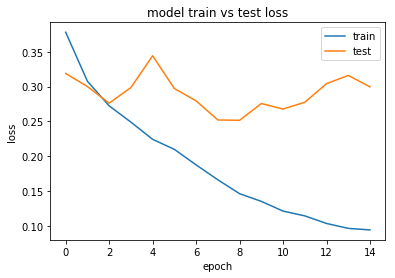

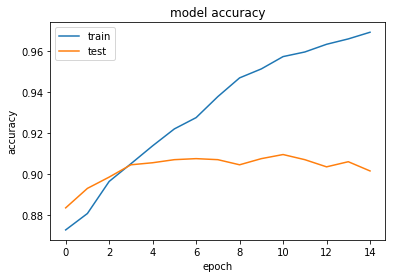

In [11]:
from matplotlib import pyplot

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs test loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper right')
pyplot.show()

# summarize history for accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [12]:
#PREDICT
y_pred = model.predict(x_test, verbose= 1, batch_size= 32)
y_pred= y_pred.round().astype(int)
y_test = y_test.astype(int)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

print('ACCURACY', accuracy_score(y_test, y_pred))
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print("F1_SCORE", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

30000/30000 [==============================] - 49s 2ms/step
ACCURACY 0.9128666666666667
ROC_AUC 0.7507468849482293
F1_SCORE 0.951034017683201
             precision    recall  f1-score   support

          0       0.70      0.53      0.60      3742
          1       0.94      0.97      0.95     26258

avg / total       0.91      0.91      0.91     30000



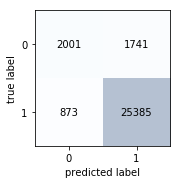

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()